In [4]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def B(T,Lwave):
    c =2.9979e8 # speed of light (2.9979 108 m s-1)
    h=6.626e-34 # Planck constant, 6.626 10-34 J s 
    k=1.3806503e-23 # Boltzmann constant, 1.3806503 10-23 J K-1 
    B= 2 *math.pi* h*pow(c,2)/(pow(Lwave,5)*(math.exp(h*c/(Lwave*k*T))-1))
    return B

In [6]:
def planck(T):
    Wein_um = 2897/T
    L_min = Wein_um * 100
    L_max = Wein_um * 19000
    Lambda_nm = np.arange(L_min, L_max)
    Lambda_m = Lambda_nm /1e9
    nn = len(Lambda_m)
    planck_sun = np.zeros((nn, 1))
    for i in range(1, nn):
        planck_sun[i] = B(T, Lambda_m[i])
    return Lambda_nm, planck_sun

In [10]:
def graph(Lambda_nm, planck_sun):
    plt.clf()
    fig = plt.figure(1)
    plt.loglog(Lambda_nm, planck_sun)
    plt.title("Planck's law, Sun")
    plt.xlabel('wavelenght, nm')
    plt.ylabel('Planck Spectral Density, B(T,lambda)')
    plt.show()

In [ ]:
# 1. Using Planck’s Law, compute and plot the electromagnetic spectrum for radiative temperatures of
# 5800K, 5000k, 298K. An example is given with the spreadsheet. You can either use the spreadsheet or
# work it up in Matlab, python or R. Be careful with units. Conversions are needed to SI units of meters,
# seconds, degrees, kilograms. Also be careful in plotting and think about the range of the x and y
# variables. Consider using log-log, vs semi-log vs linear scales. Choose the one that is best. Look at
# lecture notes for guidance. 

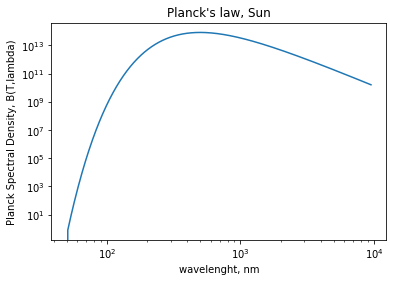

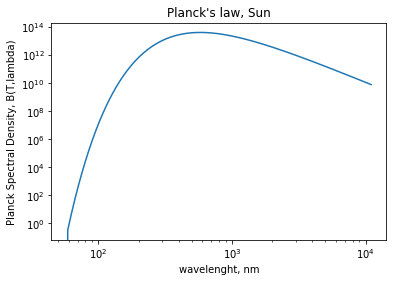

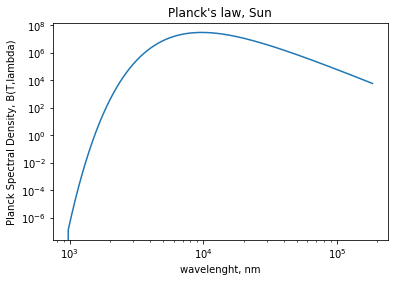

In [14]:
Lambda_nm, planck_sun = planck(5800)
graph(Lambda_nm, planck_sun)

Lambda_nm, planck_sun = planck(5000)
graph(Lambda_nm, planck_sun)

Lambda_nm, planck_sun = planck(298)
graph(Lambda_nm, planck_sun)

In [ ]:
# 2. Using Planck’s Law and the solar spectrum (computed at 5800 K) to compute the mean leaf
# reflectance for 3 cases based on the concept of weighted averages: 

In [16]:
# first data
wave_band = [400, 600, 700, 1000, 1500, 2000, 2500]
differences = [200, 100, 300, 500, 500, 500]
reflectivity = [0.1, 0.15, 0.75, 0.6, 0.8, 0.7]

In [34]:
## Weighted arithmetic mean
P_weighted = np.dot(differences, reflectivity) / 2100
P_weighted

0.6238095238095238

In [25]:
mid_points = []
for i in range(0, len(wave_band) - 1):
    mid_points.append((wave_band[i + 1] + wave_band[i]) / 2)

[500.0, 650.0, 850.0, 1250.0, 1750.0, 2250.0]

In [33]:
planck = []
for i in range(len(mid_points)):
    planck.append(B(5800, mid_points[i]))
P_weighted_planck = np.dot(np.multiply(reflectivity, planck), mid_points) / np.dot(reflectivity, planck)
P_weighted_planck

728.4657494070165

In [38]:
# second data
new_reflectivity = [0.7, 0.8, 0.6, 0.75, 0.15, 0.1]
P_weighted_2 = np.dot(differences, new_reflectivity) / 2100
P_weighted_2

0.42857142857142855

In [40]:
planck = []
for i in range(len(mid_points)):
    planck.append(B(5800, mid_points[i]))
P_weighted_planck_2 = np.dot(np.multiply(new_reflectivity, planck), mid_points) / np.dot(new_reflectivity, planck)
P_weighted_planck_2

577.6167523315943

In [ ]:
# Compute sunrise and sunset times and daylength for equinox and the summer and winter solstice for the following
# locations: 

In [41]:
def sunset(time_zone, lat_deg, long_deg):
    lat_rad=lat_deg* math.pi/180  #% latitude, radians
    long_rad=long_deg* math.pi/180 # % longitude, radians

    std_meridian = 0;
    delta_long=(long_deg - std_meridian)* math.pi/180

    delta_hours=delta_long*12/ math.pi

    declin=np.zeros((366,1), dtype=float)
    cos_hour=np.zeros((366,1), dtype=float)
    sunrise=np.zeros((366,1), dtype=float)
    sunset=np.zeros((366,1), dtype=float)
    daylength=np.zeros((366,1), dtype=float)
    beta_rad=np.zeros((366,25))
    beta_deg=np.zeros((366,25), dtype=float)

    for i in range(1,366):
        day=i
        declin[i] = -23.45*3.1415/180*math.cos(2*3.1415*(day+10)/365) #% declination angle
        cos_hour[i]=-math.tan(lat_rad)* math.tan(declin[i])
        sunrise[i]=12- 12* math.acos(cos_hour[i])/math.pi  # time of sunrise
        sunset[i]=12 + 12* math.acos(cos_hour[i])/math.pi  #% time of sunset
        daylength[i]=sunset[i]-sunrise[i]  #% hours of day length
        f=math.pi*(279.5+0.9856*day)/180

        for j in range(1,25):  # need to indent for the interior loop
           # equation of time, hours
            Et=(-104.7*math.sin(f)+596.2*math.sin(2*f)+4.3*math.sin(3*f)-12.7*math.sin(4*f)-
                        429.3*math.cos(f)-2.0*math.cos(2*f)+19.3*math.cos(3*f))/3600
            # longitudinal correction
            Lc_deg = long_deg - time_zone*15 # % degrees from local meridian
            Lc_hr=Lc_deg*4/60 #  % hours, 4 minutes/per degree
            T0 = 12-Lc_hr-Et
            hour=math.pi*(j-T0)/12  # % hour angle, radians
            #% sine of solar elevation, beta
            sin_beta=math.sin(lat_rad)*math.sin(declin[i])+math.cos(lat_rad)*math.cos(declin[i])* math.cos(hour)
            #% solar elevation, radians
            beta_rad[i][j]=math.asin(sin_beta)
            #solar elevation, degrees
            beta_deg[i][j]=beta_rad[i][j]*180/math.pi;

    ##### plot of field using pcolor
    plt.clf()
    fig = plt.figure(1)
    ax = fig.add_subplot(111)
    pc = ax.pcolor(beta_deg)
    plt.title("solar angle")
    plt.xlabel('hours')
    plt.ylabel('days')
    cb = fig.colorbar(pc)
    cb.set_label("degree")

    fig = plt.figure(2)
    ax = fig.add_subplot(111)
    pc = ax.pcolor(beta_rad)
    plt.title("Solar angle")
    plt.xlabel('hours')
    plt.ylabel('days')
    cb = fig.colorbar(pc)
    cb.set_label("radian")

    plt.xlim(0,25)
    plt.ylim(0,366)
    plt.show()

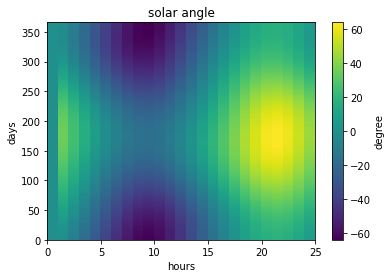

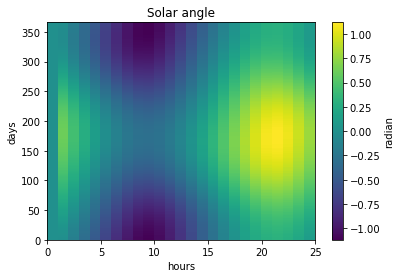

In [43]:
## Vancouver
sunset(-7, 49.2827, 123.1207)

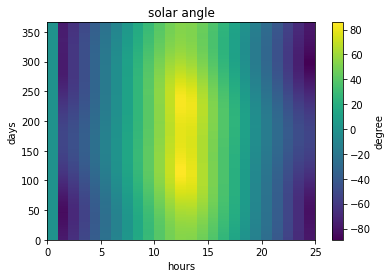

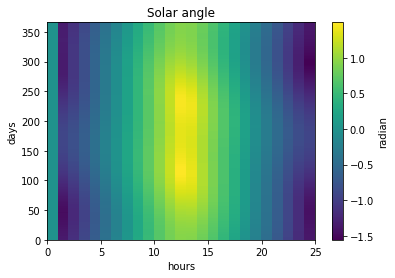

In [45]:
# BANGALORE
sunset(5.5, 12.9716, 77.5946)

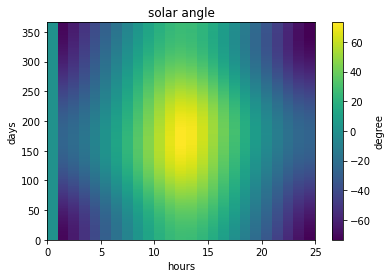

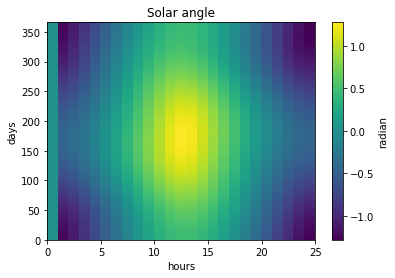

In [46]:
# beijing
sunset(8, 39.9042, 116.4074)

In [47]:
## Discussion
## We can see that for Beijing, and Bangalore, the solar times line up roughly around noon and
## is pretty symmetric on both sides. The most amount of sun is in the middle days of the year.
## However, with Beijing, we can see that because China uses one time zone, this solar time may 
## not be entirely accurate and will not necessarily have the exact reflective times. Further
## timezones are a created construct and is not entirely accurate and representative of longitude
## We see a pretty strong contrast between Vancouver and Beijing and Bangalore because the solar
## times are different the two highest solar angles are at the sides. There is also a larger cluster
## to the sides in Vancouver versus the concentration in the middle for Beijing and Bangalore.